In [1]:
from matplotlib import pyplot as plt
import numpy as np

import sys
np.set_printoptions(threshold=sys.maxsize)

In [67]:
# hacky Perlin noise generator
p, q = (4, 4)

def uniform_dir_sample():
    x = np.random.random(2) * 2 - np.array([1., 1.])
    return x

a = np.zeros((p + 1, q + 1, 2))

def randomize_arrows(a):
    for i in range(p + 1):
        for j in range(q + 1):
            a[i, j] = uniform_dir_sample()

randomize_arrows(a)

In [68]:
def smooth(w):
    return 3 * w**2 - 2 * w**3

def lerp(a, b, w):
    return a + (b - a) * smooth(w)

def dot_grad(ix, iy, x, y):
    dx = x - ix
    dy = y - iy
    return np.dot(a[ix, iy], np.array([dx, dy]))

def noise_at(x, y): # x, y in (-1, 1) space
    fx = (x + 1) / 2. * p
    fy = (y + 1) / 2. * q
    
    ix = int(fx)
    iy = int(fy)
    
    sx = fx - ix
    sy = fy - iy
    
    out = 0
    a0 = dot_grad(ix + 0, iy + 0, fx, fy)
    a1 = dot_grad(ix + 1, iy + 0, fx, fy)
    L0 = lerp(a0, a1, sx)
    b0 = dot_grad(ix + 0, iy + 1, fx, fy)
    b1 = dot_grad(ix + 1, iy + 1, fx, fy)
    L1 = lerp(b0, b1, sx)
    return lerp(L0, L1, sy)

In [93]:
u, v = (100, 100)
def hill_grid():
    grid = np.zeros((u, v))
    for i in range(u):
        for j in range(v):
            if i == 0 or i == u - 1 or j == 0 or j == v - 1:
                grid[i, j] = 0
                continue
            x, y = float(i) / u - 0.5, float(j) / v - 0.5
            grid[i, j] = np.exp(-(x**2 + y**2) / (2 * 0.2 ** 2)) / (0.2 * np.sqrt(np.pi * 2)) * 1# + noise_at(2 * x, 2 * y) * 0.5
    
    plt.gray()
    plt.imshow(grid)
    return grid

In [94]:
def make_hill(i, f):
    global a
    randomize_arrows(a)
    grid = hill_grid()
    f.write('''
    ObjectBegin "hill%d"
      Shape "heightfield"
        "integer nu" %d
        "integer nv" %d
        "float Pz" %s
    ObjectEnd
    ''' % (i, u, v, np.array2string(np.ndarray.flatten(grid))))

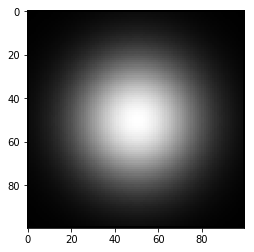

In [95]:
with open('hill.pbrt', 'w') as f:
    make_hill(1, f)
    make_hill(2, f)
    make_hill(3, f)